# Steam Popularity Prediction

**Goal:** Predict whether a Steam game will be popular based on price, reviews, playtime.

**Steps:**
1. Load & explore data
2. Clean & transform
3. EDA & visualize
4. Build models
5. Evaluate & save
6. Test predictions

### Load data

In [59]:
import pandas as pd

df = pd.read_csv('../data/raw/steamspy_raw.csv')
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,7642084,1173003,0,"100,000,000 .. 200,000,000",31506,881,5414,320,0,0,0,1013936
1,1172470,Apex Legends,Respawn,Electronic Arts,NaN,668053,326926,0,"100,000,000 .. 200,000,000",9920,728,735,275,0,0,0,124262
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",NaN,1520457,1037487,0,"100,000,000 .. 200,000,000",23066,947,5786,367,0,0,0,314682
3,1623730,Palworld,Pocketpair,Pocketpair,NaN,358266,22443,0,"50,000,000 .. 100,000,000",3669,1023,2160,470,2999,2999,0,18028
4,440,Team Fortress 2,Valve,Valve,NaN,1044264,117208,0,"50,000,000 .. 100,000,000",10042,1184,353,130,0,0,0,43819


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            1000 non-null   int64  
 1   name             1000 non-null   object 
 2   developer        1000 non-null   object 
 3   publisher        999 non-null    object 
 4   score_rank       0 non-null      float64
 5   positive         1000 non-null   int64  
 6   negative         1000 non-null   int64  
 7   userscore        1000 non-null   int64  
 8   owners           1000 non-null   object 
 9   average_forever  1000 non-null   int64  
 10  average_2weeks   1000 non-null   int64  
 11  median_forever   1000 non-null   int64  
 12  median_2weeks    1000 non-null   int64  
 13  price            1000 non-null   int64  
 14  initialprice     1000 non-null   int64  
 15  discount         1000 non-null   int64  
 16  ccu              1000 non-null   int64  
dtypes: float64(1), 

In [61]:
df.describe()

,appid,score_rank,positive,negative,userscore,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
count,1.000000e+03,0.0,1.000000e+03,1.000000e+03,1000.0,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03
mean,6.284030e+05,NaN,9.274577e+04,1.390409e+04,0.0,2413.281000,467.011000,681.88000,442.535000,1865.342000,2007.32200,5.309000,4.719540e+03
std,6.146411e+05,NaN,2.890006e+05,5.581388e+04,0.0,3820.446748,1394.379823,1210.75747,1536.369538,1771.602509,1800.35102,18.659091,3.526911e+04
min,1.000000e+01,NaN,0.000000e+00,1.000000e+00,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000e+00
25%,2.281350e+05,NaN,1.594800e+04,2.154750e+03,0.0,538.000000,29.750000,157.00000,31.750000,199.000000,199.00000,0.000000,6.950000e+01
50%,4.100200e+05,NaN,3.571400e+04,4.391000e+03,0.0,1180.000000,188.000000,337.00000,142.000000,1499.000000,1999.00000,0.000000,3.730000e+02
75%,8.950000e+05,NaN,8.042100e+04,1.009825e+04,0.0,2560.750000,418.750000,709.75000,328.750000,2999.000000,2999.00000,0.000000,1.661500e+03
max,3.241660e+06,NaN,7.642084e+06,1.173003e+06,0.0,38366.000000,19987.000000,15729.00000,19987.000000,6999.000000,6999.00000,90.000000,1.013936e+06


### Explore

In [62]:
# Check for nulls
df.isnull().sum()

appid                 0
name                  0
developer             0
publisher             1
score_rank         1000
positive              0
negative              0
userscore             0
owners                0
average_forever       0
average_2weeks        0
median_forever        0
median_2weeks         0
price                 0
initialprice          0
discount              0
ccu                   0
dtype: int64

In [63]:
df['owners'].describe()

count                       1000
unique                         7
top       2,000,000 .. 5,000,000
freq                         432
Name: owners, dtype: object

In [64]:
df['positive'].describe()

count    1.000000e+03
mean     9.274577e+04
std      2.890006e+05
min      0.000000e+00
25%      1.594800e+04
50%      3.571400e+04
75%      8.042100e+04
max      7.642084e+06
Name: positive, dtype: float64

In [65]:
df['negative'].describe()

count    1.000000e+03
mean     1.390409e+04
std      5.581388e+04
min      1.000000e+00
25%      2.154750e+03
50%      4.391000e+03
75%      1.009825e+04
max      1.173003e+06
Name: negative, dtype: float64

In [66]:
df['price'].describe()

count    1000.000000
mean     1865.342000
std      1771.602509
min         0.000000
25%       199.000000
50%      1499.000000
75%      2999.000000
max      6999.000000
Name: price, dtype: float64

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

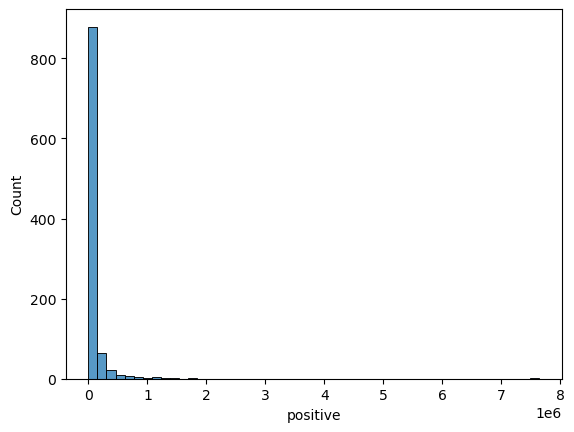

In [68]:
sns.histplot(df['positive'], bins=50)
plt.show()

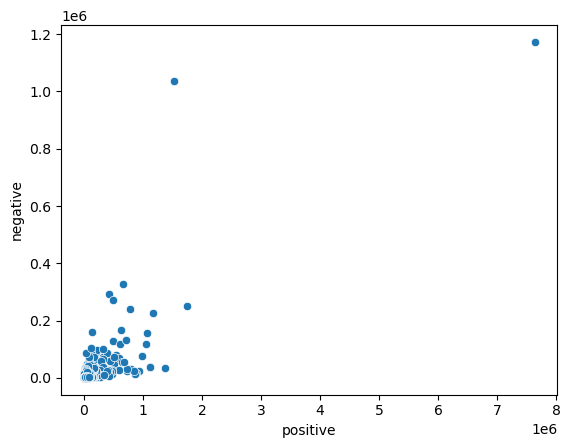

In [69]:
sns.scatterplot(x='positive', y='negative', data=df)
plt.show()

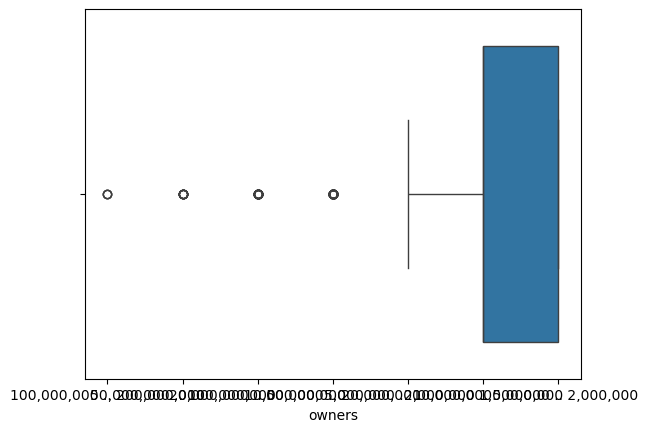

In [70]:
sns.boxplot(x=df['owners'])
plt.show()

### Clean

In [71]:
# Converting price from cents to dollars
df['price'] = df['price']/100

In [72]:
# Converting the data in owners column to average from range
def owners_midpoint(s):
    try:
        low, high = s.replace(',','').split(' .. ')
        return (int(low) + int(high)) // 2
    except:
        return None

df['owners_est'] = df['owners'].apply(owners_midpoint)

In [73]:
# Creating a column for popularity, popular if owners more than 10 million
df['popular'] = df['owners_est'].apply(lambda x: 1 if x and x>10_000_000 else 0)

In [74]:
df.nunique()

appid              1000
name                992
developer           693
publisher           499
score_rank            0
positive            992
negative            958
userscore             1
owners                7
average_forever     847
average_2weeks      534
median_forever      669
median_2weeks       482
price                58
initialprice         36
discount             19
ccu                 709
owners_est            7
popular               2
dtype: int64

In [75]:
# dropping score_rank column as its empty
df = df.drop('score_rank', axis=1)

# All values is 0
df = df.drop('userscore', axis=1)

### Exploring after Cleaning

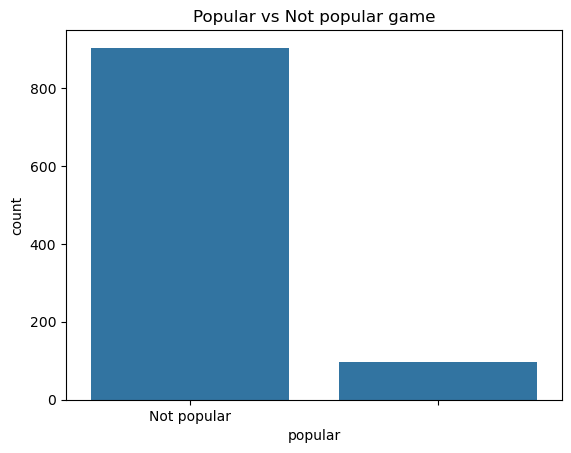

In [76]:
# number of popular games
sns.countplot(x='popular', data=df)
plt.title('Popular vs Not popular game')
plt.xticks([0,1], ['Not popular',''])
plt.show()

Only a small fraction of games have over 10 million owners

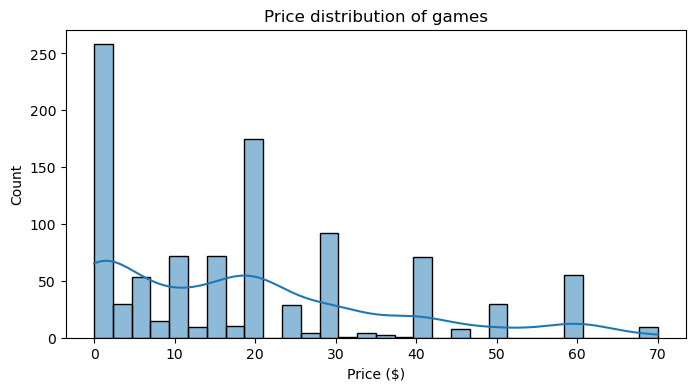

In [77]:
# Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price distribution of games')
plt.xlabel('Price ($)')
plt.show()

Most games are free or priced lower than 10$

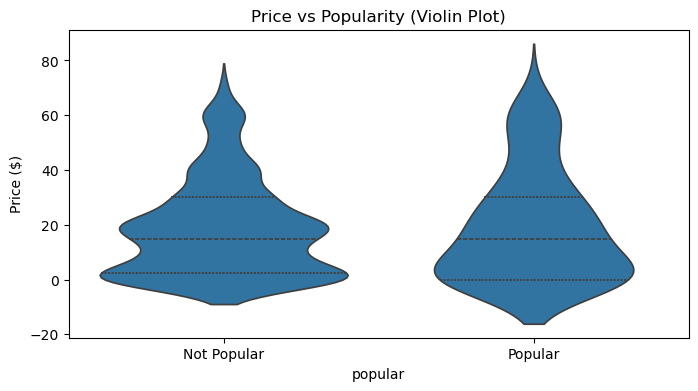

In [78]:
plt.figure(figsize=(8,4))
sns.violinplot(x='popular', y='price', data=df, inner='quartile')
plt.xticks([0,1], ['Not Popular', 'Popular'])
plt.title('Price vs Popularity (Violin Plot)')
plt.ylabel('Price ($)')
plt.show()

0-20$ games are more popular collectively.
Both Cheap and Pricey games are popular.

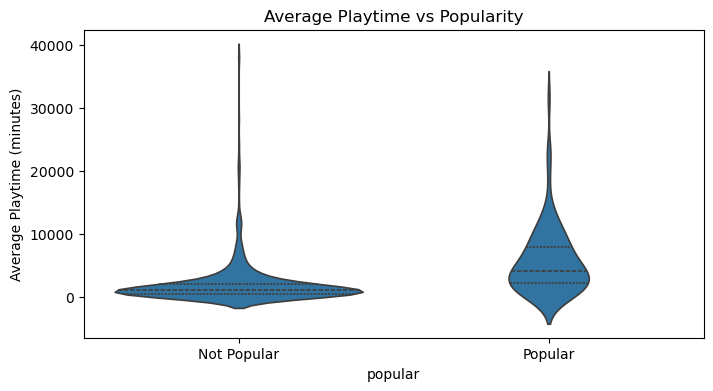

In [79]:
plt.figure(figsize=(8,4))
sns.violinplot(x='popular', y='average_forever', data=df, inner='quartile')
plt.xticks([0,1], ['Not Popular', 'Popular'])
plt.title('Average Playtime vs Popularity')
plt.ylabel('Average Playtime (minutes)')
plt.show()

Popular games have higher average playtime.
Player retention shows the games is popular.

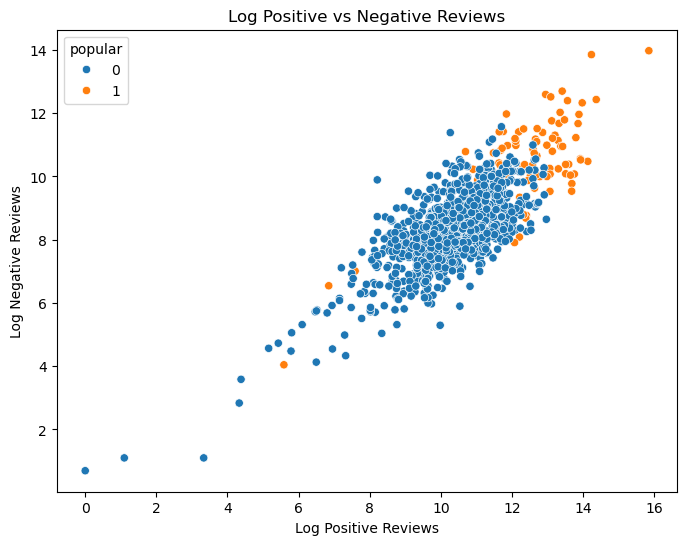

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x=np.log1p(df['positive']),
    y=np.log1p(df['negative']),
    hue='popular',
)
plt.title('Log Positive vs Negative Reviews')
plt.xlabel('Log Positive Reviews')
plt.ylabel('Log Negative Reviews')
plt.show()


### Create new features

In [81]:

df['positive_log'] = np.log1p(df['positive'])
df['negative_log'] = np.log1p(df['negative'])
df['playtime_log'] = np.log1p(df['average_forever'])

# Binary target
df['popular'] = df['owners_est'].apply(lambda x: 1 if x >= 10_000_000 else 0)

### Train-test split

In [82]:
from sklearn.model_selection import train_test_split

features = ['price', 'positive_log', 'negative_log', 'playtime_log']
X = df[features]
y = df['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
#Scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy in percent:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy in percent: 0.94
Confusion Matrix:
 [[179   1]
 [ 11   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       180
           1       0.90      0.45      0.60        20

    accuracy                           0.94       200
   macro avg       0.92      0.72      0.78       200
weighted avg       0.94      0.94      0.93       200



In [85]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.935
Confusion Matrix:
 [[178   2]
 [ 11   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       180
           1       0.82      0.45      0.58        20

    accuracy                           0.94       200
   macro avg       0.88      0.72      0.77       200
weighted avg       0.93      0.94      0.93       200



In [86]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.935
Confusion Matrix:
 [[178   2]
 [ 11   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       180
           1       0.82      0.45      0.58        20

    accuracy                           0.94       200
   macro avg       0.88      0.72      0.77       200
weighted avg       0.93      0.94      0.93       200



price: 0.0417
positive_log: 0.5012
negative_log: 0.3651
playtime_log: 0.0919


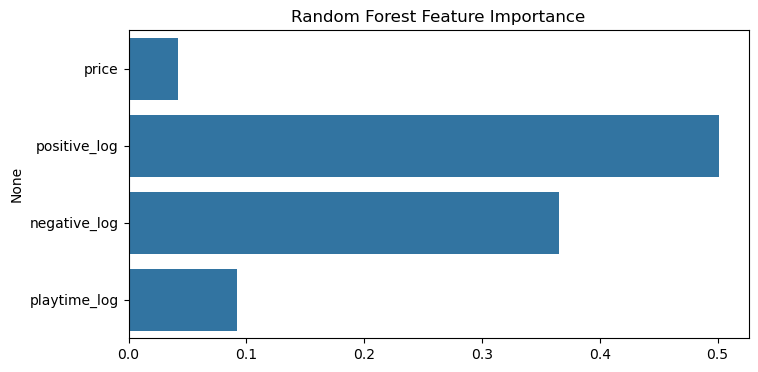

In [87]:
importances = forest.feature_importances_
features = X_train.columns

for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.4f}")

# Optional: plot
plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importance")
plt.show()

In [88]:
import joblib
joblib.dump(forest, '../models/random_forest_model.pkl')

['../models/random_forest_model.pkl']

## ✅ Final model: Random Forest, 95% accuracy

**Key insights:**  
- Positive reviews & owners are strong predictors.  
- Price has moderate impact.  
- Playtime also useful.  